# Observations
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pp

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


592


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#temp, humidity, Cloudiness, Windspeed, latitude, longitude, and temp max are all stored separately
place = []
humidity =[]
cloudiness = []
windspeed = []
long = []
lat=[]
temp=[]
temp_max = []

#setting variable that will be used to track how mayn cities are cycled
total_cities = 0
#cycle through the API for every city found
for city in cities:
    try:
        target_url = ("http://api.openweathermap.org/data/2.5/weather?q={0}&appid={1}").format(city,weather_api_key)
        response = requests.get(target_url).json()
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        long.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
      #convert from kelvin to farenheit  
        temp.append(((response['main']['temp'])-273.15)*(9/5) + 32)
        temp_max.append(((response['main']['temp_max'])-273.15)*(9/5) + 32) 
        #city last to account for any errors from pulling from the API
        place.append(city)
        total_cities+=1
        print(f'{city} is city number {total_cities} added to the dataframe.')
    #considering if the data cannot be found, print info of city
    #adds onto to total_cities to keep appropriate count
    except (KeyError, IndexError):
        total_cities+=1
        print(f' City number {total_cities} ({city}) not found, moving to next city.')
        


tasiilaq is city number 1 added to the dataframe.
harper is city number 2 added to the dataframe.
ushuaia is city number 3 added to the dataframe.
kodiak is city number 4 added to the dataframe.
hilo is city number 5 added to the dataframe.
vestmannaeyjar is city number 6 added to the dataframe.
 City number 7 (wampusirpi) not found, moving to next city.
khatanga is city number 8 added to the dataframe.
fortuna is city number 9 added to the dataframe.
 City number 10 (sentyabrskiy) not found, moving to next city.
hvide sande is city number 11 added to the dataframe.
avarua is city number 12 added to the dataframe.
touros is city number 13 added to the dataframe.
yumen is city number 14 added to the dataframe.
hongjiang is city number 15 added to the dataframe.
mayo is city number 16 added to the dataframe.
ingham is city number 17 added to the dataframe.
 City number 18 (taolanaro) not found, moving to next city.
viransehir is city number 19 added to the dataframe.
belawan is city numb

bambous virieux is city number 158 added to the dataframe.
slave lake is city number 159 added to the dataframe.
sojat is city number 160 added to the dataframe.
alofi is city number 161 added to the dataframe.
bundaberg is city number 162 added to the dataframe.
ulladulla is city number 163 added to the dataframe.
 City number 164 (karamay) not found, moving to next city.
sitka is city number 165 added to the dataframe.
road town is city number 166 added to the dataframe.
airai is city number 167 added to the dataframe.
bhander is city number 168 added to the dataframe.
ramnagar is city number 169 added to the dataframe.
kurayoshi is city number 170 added to the dataframe.
vila franca do campo is city number 171 added to the dataframe.
barmer is city number 172 added to the dataframe.
clyde river is city number 173 added to the dataframe.
barrow is city number 174 added to the dataframe.
kirakira is city number 175 added to the dataframe.
kaseda is city number 176 added to the datafra

ayan is city number 314 added to the dataframe.
thinadhoo is city number 315 added to the dataframe.
manyana is city number 316 added to the dataframe.
narsaq is city number 317 added to the dataframe.
maceio is city number 318 added to the dataframe.
kyrksaeterora is city number 319 added to the dataframe.
esmeraldas is city number 320 added to the dataframe.
 City number 321 (wulanhaote) not found, moving to next city.
baykit is city number 322 added to the dataframe.
husavik is city number 323 added to the dataframe.
port elizabeth is city number 324 added to the dataframe.
afua is city number 325 added to the dataframe.
sao filipe is city number 326 added to the dataframe.
natal is city number 327 added to the dataframe.
talcahuano is city number 328 added to the dataframe.
malanje is city number 329 added to the dataframe.
qaqortoq is city number 330 added to the dataframe.
pimentel is city number 331 added to the dataframe.
businga is city number 332 added to the dataframe.
forio

frederikshavn is city number 470 added to the dataframe.
soyo is city number 471 added to the dataframe.
 City number 472 (phan rang) not found, moving to next city.
ketchikan is city number 473 added to the dataframe.
denpasar is city number 474 added to the dataframe.
uarini is city number 475 added to the dataframe.
portree is city number 476 added to the dataframe.
sakakah is city number 477 added to the dataframe.
yarim is city number 478 added to the dataframe.
 City number 479 (kuche) not found, moving to next city.
ulaanbaatar is city number 480 added to the dataframe.
carnarvon is city number 481 added to the dataframe.
necochea is city number 482 added to the dataframe.
nyimba is city number 483 added to the dataframe.
mangochi is city number 484 added to the dataframe.
abnub is city number 485 added to the dataframe.
bondoukou is city number 486 added to the dataframe.
rio cuarto is city number 487 added to the dataframe.
trairi is city number 488 added to the dataframe.
lys

In [4]:
#confirm all data received is matching
print(len(place))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(long))
print(len(temp))

548
548
548
548
548
548


In [8]:
#take all the information, store it into a dictionary to convert into a dataframe later
weather_dict = {
    "city": place,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed,
    "long": long,
    "lat":lat,
"temp":temp,
"max_temp":temp_max}

In [9]:
#bring all the data into a dataframe
weather_df = pd.DataFrame(weather_dict)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#export results into a local csv
weather_df.to_csv(r'weather_data.csv', header = True)
#display dataframe
weather_df

,city,humidity,cloudiness,windspeed,long,lat,temp,max_temp
0,tasiilaq,86,100,10.80,-37.64,65.61,30.200,30.200
1,harper,86,66,2.18,-7.72,4.38,78.422,78.422
2,ushuaia,81,75,17.00,-68.30,-54.80,50.000,50.000
3,kodiak,63,75,6.70,-152.41,57.79,30.200,30.200
4,hilo,69,75,2.60,-155.09,19.73,72.518,75.992
...,...,...,...,...,...,...,...,...
543,kihei,69,40,8.20,-156.47,20.79,72.662,75.200
544,aqtobe,86,90,3.00,57.21,50.28,28.400,28.400
545,caconda,95,0,1.34,15.07,-13.73,60.116,60.116
546,chapais,64,1,4.10,-74.85,49.78,-0.400,-0.400


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

C:\Users\Cody\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


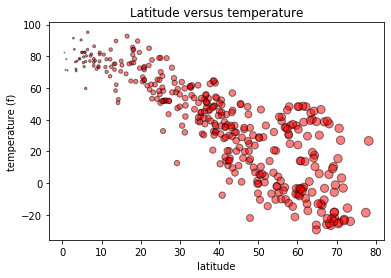

In [11]:
#defining x-axis after latitude due to multiple references to it
x_axis = weather_df['lat']
plt.scatter(x_axis, weather_df["temp"], marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.5)
plt.title("Latitude versus temperature")
plt.xlabel('latitude')
plt.ylabel('temperature (f)')
plt.savefig('lat_vs_temp.png')

#### Latitude vs. Humidity Plot

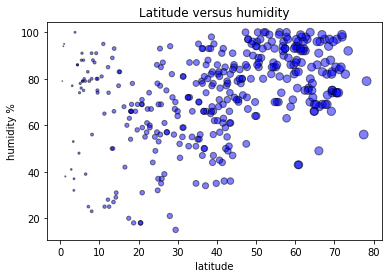

In [12]:
plt.scatter(x_axis, weather_df["humidity"], marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.5)
plt.title("Latitude versus humidity")
plt.xlabel('latitude')
plt.ylabel('humidity %')
plt.savefig('lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

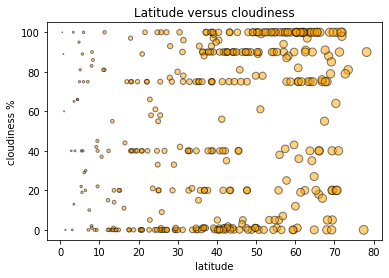

In [13]:
plt.scatter(x_axis, weather_df["cloudiness"], marker="o", facecolors="orange", edgecolors="black",
            s=x_axis, alpha=0.5)
plt.title("Latitude versus cloudiness")
plt.xlabel('latitude')
plt.ylabel('cloudiness %')
plt.savefig('lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

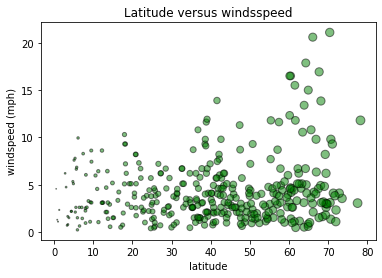

In [14]:
x_axis = weather_df['lat']
plt.scatter(x_axis, weather_df["windspeed"], marker="o", facecolors="green", edgecolors="black",
            s=x_axis, alpha=0.5)
plt.title("Latitude versus windsspeed")
plt.xlabel('latitude')
plt.ylabel('windspeed (mph)')
plt.savefig('lat_vs_windspeed.png')

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[(weather_df["lat"]>0)]
southern_hemisphere = weather_df.loc[(weather_df["lat"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

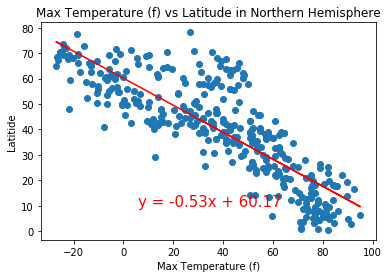

In [16]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['max_temp']
y_values = northern_hemisphere['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temperature (f)')
plt.ylabel('Latitide')
plt.title('Max Temperature (f) vs Latitude in Northern Hemisphere')
plt.savefig('max_temp_vs_lat_north.png')



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

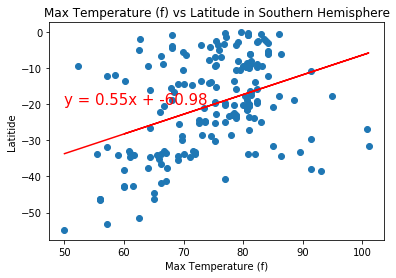

In [17]:
x_values = southern_hemisphere['max_temp']
y_values = southern_hemisphere['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,-20),fontsize=15,color="red")
plt.xlabel('Max Temperature (f)')
plt.ylabel('Latitide')
plt.title('Max Temperature (f) vs Latitude in Southern Hemisphere')
plt.savefig('max_temp_vs_lat_south.png')



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

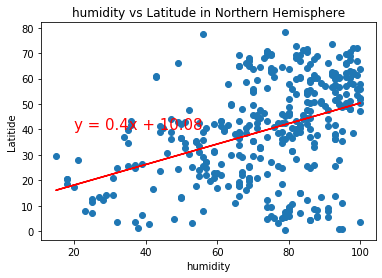

In [18]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['humidity']
y_values = northern_hemisphere['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('humidity')
plt.ylabel('Latitide')
plt.title('humidity vs Latitude in Northern Hemisphere')
plt.savefig('humidity_vs_lat_north.png')



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

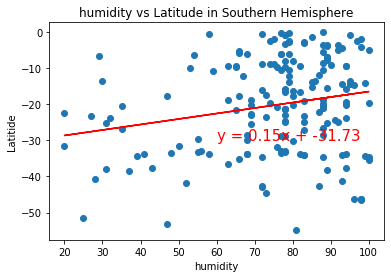

In [19]:
x_values = southern_hemisphere['humidity']
y_values = southern_hemisphere['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-30),fontsize=15,color="red")
plt.xlabel('humidity')
plt.ylabel('Latitide')
plt.title('humidity vs Latitude in Southern Hemisphere')
plt.savefig('humidity_vs_lat_south.png')



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

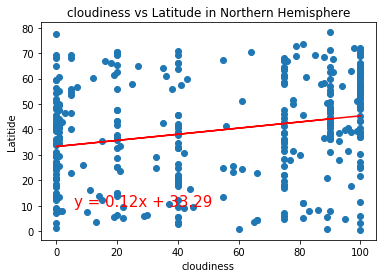

In [20]:
x_values = northern_hemisphere['cloudiness']
y_values = northern_hemisphere['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('cloudiness')
plt.ylabel('Latitide')
plt.title('cloudiness vs Latitude in Northern Hemisphere')
plt.savefig('cloudiness_vs_lat_north.png', bbox_inches='tight')



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

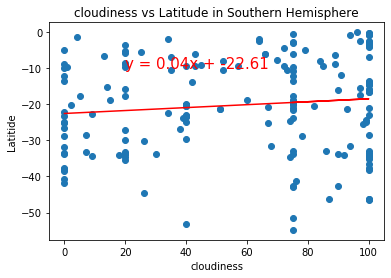

In [21]:
x_values = southern_hemisphere['cloudiness']
y_values = southern_hemisphere['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.xlabel('cloudiness')
plt.ylabel('Latitide')
plt.title('cloudiness vs Latitude in Southern Hemisphere')
plt.savefig('cloudiness_vs_lat_south.png')



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

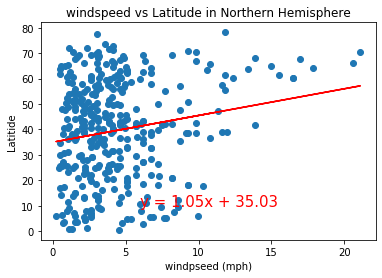

In [22]:
x_values = northern_hemisphere['windspeed']
y_values = northern_hemisphere['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('windpseed (mph)')
plt.ylabel('Latitide')
plt.title('windspeed vs Latitude in Northern Hemisphere')
plt.savefig('windspeed_vs_lat_north.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

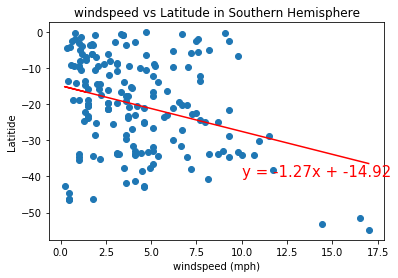

In [24]:
x_values = southern_hemisphere['windspeed']
y_values = southern_hemisphere['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-40),fontsize=15,color="red")
plt.xlabel('windspeed (mph)')
plt.ylabel('Latitide')
plt.title('windspeed vs Latitude in Southern Hemisphere')
plt.savefig('windspeed_vs_lat_south.png')